<a href="https://colab.research.google.com/github/meharkhanniazi/Potato-Disease-Classification-Project/blob/main/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
imageSize = 256
batchSize = 32
channelSize = 3
epochs = 30

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/PlantVillage",
    shuffle=True,
    image_size=(imageSize, imageSize),
    batch_size=batchSize
)

Found 2152 files belonging to 3 classes.


In [7]:
classNames = dataset.class_names
classNames

['Early Blight', 'Healthy', 'Late Blight']

In [8]:
for imageBatch, labelBatch in dataset.take(1):
    print(imageBatch.shape)
    print(labelBatch.numpy())

(32, 256, 256, 3)
[2 0 2 0 2 0 2 0 1 2 0 0 2 0 0 0 1 0 0 2 0 0 2 2 0 2 0 0 0 2 0 1]


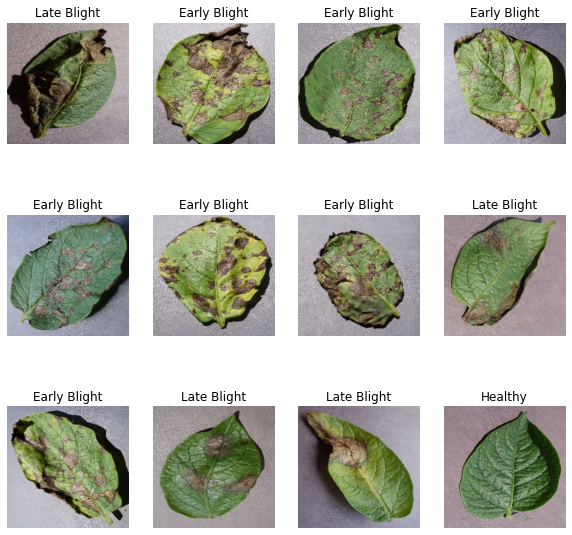

In [9]:
plt.figure(figsize=(10,10))
for imageBatch, labelBatch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(imageBatch[i].numpy().astype("uint8"))
        plt.title(classNames[labelBatch[i]])
        plt.axis("off")
    

In [10]:
trainingSize = 0.8
validationSize = 0.1
testSize = 0.1

In [11]:
training_ds = dataset.take(int(len(dataset) * trainingSize))

In [12]:
remaining_ds = dataset.skip(len(training_ds))

In [13]:
validation_ds = remaining_ds.take(int(len(remaining_ds) * 0.5))

In [14]:
test_ds = remaining_ds.skip(len(validation_ds))

In [15]:
def getDatasetPartitions(ds, shuffle=True, shuffleSize=1000, trainingSize = 0.8, validationSize = 0.1, testSize = 0.1):
    if shuffle:
        ds = ds.shuffle(shuffleSize, seed=12)
    training_ds = ds.take(int(len(ds) * trainingSize))
    remaining_ds = ds.skip(len(training_ds))
    validation_ds = ds.take(int(len(ds) * validationSize))
    test_ds = remaining_ds.skip(len(validation_ds))
    return training_ds, validation_ds, test_ds

In [16]:
training_ds, validation_ds, test_ds = getDatasetPartitions(dataset)

In [17]:
len(training_ds)

54

In [18]:
len(validation_ds)

6

In [19]:
len(test_ds)

8

In [20]:
training_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(imageSize, imageSize),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [23]:
no_of_classes = len(classNames)
inputShape = (batchSize, imageSize, imageSize, channelSize)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=inputShape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(no_of_classes, activation='softmax')
])

model.build(input_shape=inputShape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [26]:
history = model.fit(
    training_ds,
    epochs = epochs,
    batch_size = batchSize,
    verbose = 1,
    validation_data = validation_ds
)

Epoch 1/15
54/54 [==============================] - 384s 4s/step - loss: 0.9049 - accuracy: 0.4954 - val_loss: 0.8939 - val_accuracy: 0.5972
Epoch 2/15
54/54 [==============================] - 240s 4s/step - loss: 0.8299 - accuracy: 0.6117 - val_loss: 0.6258 - val_accuracy: 0.7309
Epoch 3/15
54/54 [==============================] - 240s 4s/step - loss: 0.5007 - accuracy: 0.8009 - val_loss: 0.3544 - val_accuracy: 0.8594
Epoch 4/15
54/54 [==============================] - 240s 4s/step - loss: 0.3791 - accuracy: 0.8478 - val_loss: 0.2956 - val_accuracy: 0.8906
Epoch 5/15
54/54 [==============================] - 238s 4s/step - loss: 0.2943 - accuracy: 0.8762 - val_loss: 0.2707 - val_accuracy: 0.8970
Epoch 6/15
54/54 [==============================] - 239s 4s/step - loss: 0.2716 - accuracy: 0.8993 - val_loss: 0.2742 - val_accuracy: 0.8895
Epoch 7/15
54/54 [==============================] - 238s 4s/step - loss: 0.2346 - accuracy: 0.9115 - val_loss: 0.2632 - val_accuracy: 0.9034
Epoch 8/15
54

In [27]:
history

In [28]:
history.params

{'epochs': 15, 'steps': 54, 'verbose': 1}

In [30]:
model.evaluate(test_ds)

54/54 [==============================] - 48s 881ms/step - loss: 0.2658 - accuracy: 0.8918


[0.2658410668373108, 0.8917824029922485]

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
history.history['accuracy']

[0.49537035822868347,
 0.6116898059844971,
 0.8009259104728699,
 0.8478009104728699,
 0.8761574029922485,
 0.8993055820465088,
 0.9114583134651184,
 0.9259259104728699,
 0.9293981194496155,
 0.9317129850387573,
 0.9438657164573669,
 0.9513888955116272,
 0.9664351940155029,
 0.9675925970077515,
 0.9629629850387573]

First Image to Predict:
Actual Label:  Early Blight
Predicted Label:  Late Blight


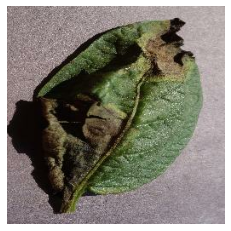

In [45]:
import numpy as np
for imgBatch, lblBatch in test_ds.take(1):
  firstImg = imageBatch[0].numpy().astype('uint8')
  firstLbl = lblBatch[0]

  print('First Image to Predict:')
  plt.imshow(firstImg)
  plt.axis('off')
  print("Actual Label: ", classNames[firstLbl])
  batchPrediction = model.predict(imageBatch)
  print('Predicted Label: ',classNames[np.argmax(batchPrediction[0])])